# INSTRUÇÕES

O Arquivo contém do exercicio 11 do capitulo 3 até o último exercicio. Os exercícios anteriores a este está no WORD.<br>
<br>
Para pesquisar (CTRL F) por um exercicio neste PDF basta colocar <br>
[Numero do exercicio - capitulo]<br>
<br>
Exemplo [11-3] exercicio 11 capitulo 3.<br>
Exemplo [9-4] exercicio 9 capitulo 4.
<br><br>
OBS: Não utilizar zeros na frente dos números 




## [11-3]

In [4]:
import pandas as pd
import numpy as np


In [5]:
file = 'C:/Users/Wesleya/Desktop/Lista Estat/arquivo ex 10.xlsx'
df1 = pd.read_excel(file,sheet_name="Sheet1", index_col=False)

In [6]:
df1.head()

,col1
0,"54,7"
1,"55,0"
2,"55,2"
3,"60,4"
4,"62,0"


In [7]:
df1_sorted = df1.sort_values(by=['col1'])

In [8]:
df1_sorted['col1'] = df1_sorted['col1'].str.replace(',','.')
df1_sorted = df1_sorted['col1'].astype('float64') 
amplitude = df1_sorted.max() - df1_sorted.min()

In [9]:
amplitude

44.599999999999994

In [10]:
df1_sorted.head()

0    54.7
1    55.0
2    55.2
3    60.4
4    62.0
Name: col1, dtype: float64

In [17]:
k = np.sqrt(len(df1_sorted))
h = amplitude/k 
h =  round(h)
h

6.0

In [24]:
#https://pt.stackoverflow.com/questions/270580/como-fazer-uma-tabela-de-distribui%C3%A7%C3%A3o-de-frequ%C3%AAncia-em-python
frequencias = []
menor = round(df1_sorted.min(),1)
menor_amp = round(menor+h,1)

valor = menor
while valor < df1_sorted.max():
    frequencias.append('{} - {}'.format(round(valor,1),round(valor+h,1)))
    valor += h

In [25]:
freq_abs = pd.qcut(df1_sorted,len(frequencias),labels=frequencias) # Discretização dos valores em k faixas, rotuladas pela lista criada anteriormente
print(pd.value_counts(freq_abs))

96.7 - 102.7    7
54.7 - 60.7     7
90.7 - 96.7     6
84.7 - 90.7     6
78.7 - 84.7     6
72.7 - 78.7     6
66.7 - 72.7     6
60.7 - 66.7     6
Name: col1, dtype: int64


## [12-3]

In [27]:
import pandas as pd
import numpy as np
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Banco de dados capitulo 3/Desidratacao.xls'
df = pd.read_excel(file,sheet_name="Plan1", index_col=False)

### [12-3] A) e B)

In [28]:
#calculo da moda(mode) media(mean) e mediana(median)
df['col1'].mode()

0      5.116667
1      5.966667
2      6.183333
3      7.000000
4      7.216667
5      7.300000
6      7.483333
7      8.466667
8      8.733333
9      9.066667
10    10.250000
11    12.400000
12    15.000000
dtype: float64

In [29]:
df.quantile([0.25,0.5,0.75])

,col1
0.25,6.870833
0.50,8.686667
0.75,11.120833


In [30]:
q1=6.870833
q3=11.120833
aiq= q3 - q1
xMenor = q1 - (1.5 * aiq)
xMaior = q3 + (1.5 * aiq)
print (" Menor valor: " + str(xMenor) + "-  Maior valor :" +  str(xMaior))

 Menor valor: 0.49583300000000197-  Maior valor :17.495832999999998


In [31]:
#procurando outliers x menor
df[df['col1']<xMenor]

,col1


In [32]:
#procurando outliers x menor
df[df['col1']>xMaior]

,col1
62,19.316667
82,23.366667


### [12-3] C)

In [33]:
#Calculo dos percentis python
p10 = np.percentile(df['col1'], 10)
p90 = np.percentile(df['col1'], 90)
print (" Menor valor: " + str(p10) + "-  Maior valor :" +  str(p90))

 Menor valor: 5.551666666666667-  Maior valor :13.595000000000004


### [12-3] D)

In [34]:
#Calculo dos decis python
d3 = np.percentile(df['col1'], 30)
d6 = np.percentile(df['col1'], 60)
print (" Menor valor: " + str(d3) + "-  Maior valor :" +  str(d6))

 Menor valor: 7.176666666666666-  Maior valor :9.416666666666666


### [12-3] E)

In [35]:
#amplitude
print(df['col1'].max() - df['col1'].min())

19.433333333333334


In [36]:
#Desvio medio(é a somatorio do desvio absoluto, sum(valores menos a médio) )
df.mad();

col1    2.69796
dtype: float64

In [37]:
#variancia
df.var()

col1    11.956975
dtype: float64

In [38]:
#desvio padrãoUm desvio padrão grande significa que os valores amostrais estão bem distribuídos em torno da média, enquanto que um desvio padrão pequeno indica que eles estão condensados próximos da média.
#https://operdata.com.br/blog/desvio-padrao-e-erro-padrao/
df.std()

col1    3.457886
dtype: float64

In [39]:
#erro padrão (O erro padrão é uma medida de variação de uma média amostral em relação à média da população)
#https://operdata.com.br/blog/desvio-padrao-e-erro-padrao/
df.sem()

col1    0.345789
dtype: float64

In [40]:
#coeficiente de variação
from scipy.stats import variation 
var = variation(df['col1'], axis=0)
var

0.3711238474598735

### [12-3] F)

In [41]:
#Assimetria da distrubuição dos dados
skewValue = df.skew(axis=0)
skewValue

col1    1.113769
dtype: float64

### [12-3] G)

In [42]:
from scipy.stats import norm, kurtosis
kurtosis(df['col1'])

1.8683138789477693

### [12-3] H)

In [43]:
#definindo quantidade de intervalos para o histograma 
k = np.sqrt(len(df))
k

10.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD9E2D79E8>]],
      dtype=object)

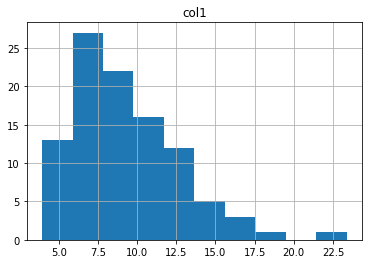

In [44]:
df.hist(bins=10)

In [6]:
#instalação do pacote para ramos e folhas (stem and leaf)
#import sys
#!{sys.executable} -m pip install -U stemgraphic

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


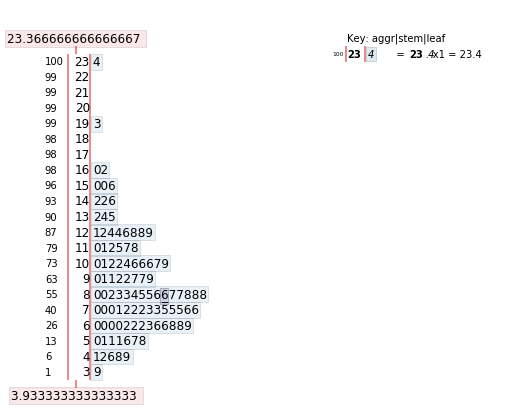

In [45]:
import stemgraphic
#y = pd.Series(x)

fig, ax = stemgraphic.stem_graphic(df['col1'])

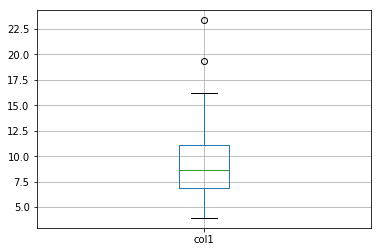

In [46]:
#boxplot
df.boxplot()

## [13-3]

### [13-3] A)

In [12]:

file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Banco de dados capitulo 3/Servicos.xls'
df = pd.read_excel(file,sheet_name="Plan1", index_col=False)

In [48]:
#calculo da moda(mode) media(mean) e mediana(median)
#Calculo da mediana
df.median(axis=0)

Serviço1     7.5
Serviço2     9.0
Serviço3    12.0
dtype: float64

In [49]:
#Calculo da moda
df.mode()

,Serviço1,Serviço2,Serviço3
0,2.0,4.0,5
1,8.0,NaN,6
2,NaN,NaN,13
3,NaN,NaN,14


In [50]:
df.mean(axis=0)

Serviço1     7.56
Serviço2     9.66
Serviço3    11.68
dtype: float64

### [13-3] B)

In [51]:
#variancia
df.var()

Serviço1    13.435102
Serviço2    20.759592
Serviço3    21.364898
dtype: float64

In [52]:
df.std()

Serviço1    3.665392
Serviço2    4.556270
Serviço3    4.622218
dtype: float64

In [53]:
df.sem()

Serviço1    0.518365
Serviço2    0.644354
Serviço3    0.653680
dtype: float64

### [13-3] C)

In [54]:
df.quantile([0.25,0.75])

,Serviço1,Serviço2,Serviço3
0.25,5.0,6.0,8.00
0.75,10.0,14.0,14.75


In [55]:
Serviço1q1=5
Serviço1q3=10
Serviço1aiq= Serviço1q3 - Serviço1q1
xMenor1 = Serviço1q1 - (1.5 * Serviço1aiq)
xMaior1 = Serviço1q3 + (1.5 * Serviço1aiq)


Serviço2q1=6
Serviço2q3=14
Serviço2aiq= Serviço2q3 - Serviço2q1
xMenor2 = Serviço2q1 - (1.5 * Serviço2aiq)
xMaior2 = Serviço2q3 + (1.5 * Serviço2aiq)


Serviço3q1=8
Serviço3q3=14.75
Serviço3aiq= Serviço3q3 - Serviço3q1
xMenor3 = Serviço3q1 - (1.5 * Serviço3aiq)
xMaior3 = Serviço3q3 + (1.5 * Serviço3aiq)

print (" Serviço1  >>>>Menor valor: " + str(xMenor1) + "  -  Maior valor :" +  str(xMaior1) +
      "\n Serviço2  >>>>Menor valor: " + str(xMenor2) + "  -  Maior valor :" +  str(xMaior2) +
      "\n Serviço3  >>>>Menor valor: " + str(xMenor3) + "  -  Maior valor :" +  str(xMaior3))


 Serviço1  >>>>Menor valor: -2.5  -  Maior valor :17.5
 Serviço2  >>>>Menor valor: -6.0  -  Maior valor :26.0
 Serviço3  >>>>Menor valor: -2.125  -  Maior valor :24.875


In [56]:
#subset
#procurando outliers x menor
a = df[df['Serviço1']<xMenor]
b = df[df['Serviço2']<xMenor2]
c = df[df['Serviço3']<xMenor3]

#Outliers extremidade superior
d = df[['Serviço1']]
e = df[['Serviço2']]
f = df[['Serviço3']]

d = d[d['Serviço1']>xMaior]
e = e[e['Serviço2']>xMaior2]
f = f[f['Serviço3']>xMaior3]



In [57]:
#Sem outliers para a extremidade inferior em Serviço 1, 2 e 3
print(a,b,c)

Empty DataFrame
Columns: [Serviço1, Serviço2, Serviço3]
Index: [] Empty DataFrame
Columns: [Serviço1, Serviço2, Serviço3]
Index: [] Empty DataFrame
Columns: [Serviço1, Serviço2, Serviço3]
Index: []


In [58]:
#Sem outliers para a extremidade superior em Serviço 1, 2 e 3
print(d,e,f)

Empty DataFrame
Columns: [Serviço1]
Index: [] Empty DataFrame
Columns: [Serviço2]
Index: [] Empty DataFrame
Columns: [Serviço3]
Index: []


### [13-3] D)

In [59]:
#Coeficientes de fisher kurtose

#Platicurtica as tres curvas
from scipy.stats import norm, kurtosis
kurtosis(df, fisher=True)

array([-1.10353401, -1.16214914, -1.0303193 ])

In [60]:
#Coeficientes de fisher pearson

#Assimetricas positivas á direita
from scipy.stats import skew
skew(df)

array([0.0800593 , 0.17709319, 0.18550989])

### [13-3] E)

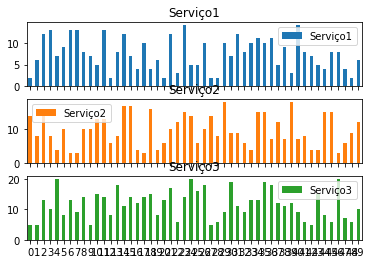

In [61]:
#Grafico de barras
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  

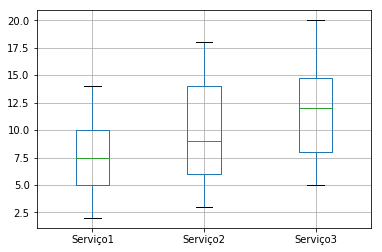

In [62]:
#boxplot
df.boxplot()

In [63]:
#definindo quantidade de intervalos para o histograma 
k = np.sqrt(len(df))
k

7.0710678118654755

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA0EECA20>,
      dtype=object)

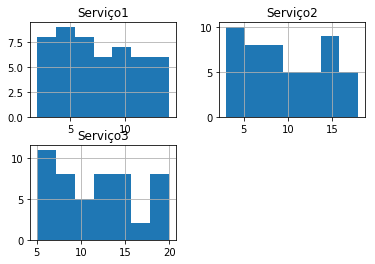

In [64]:
df.hist(bins=7)

## [14-3]

### [14-3] A)

In [66]:
d = {'Tempo':[30,32,33,35,38,40,42,43,45,50],
   'Numero de Dias':[4,7,10,12,18,22,20,15,8,4]}
df = pd.DataFrame(d)
df

,Tempo,Numero de Dias
0,30,4
1,32,7
2,33,10
3,35,12
4,38,18
5,40,22
6,42,20
7,43,15
8,45,8
9,50,4


In [67]:
Media_ponderada = (sum(df['Tempo'] * df['Numero de Dias']))/df['Numero de Dias'].sum()

In [68]:
Media_ponderada

39.19166666666667

In [69]:
#Desagrupando dados para realizar os calculos
def ungrouping(df, cnt):
    df = df.copy(deep=True)
    df = df.loc[np.repeat(df.index.values,df[cnt])
               ].reset_index(drop=True)
    df[cnt] = 1
    return df

In [70]:
df2 = ungrouping(df, 'Numero de Dias')

In [71]:
df2.head()

,Tempo,Numero de Dias
0,30,1
1,30,1
2,30,1
3,30,1
4,32,1


### [14-3] B)

In [72]:
df2.quantile([0.25,0.75])

,Tempo,Numero de Dias
0.25,35.0,1.0
0.75,42.0,1.0


### [14-3] C)

In [73]:
#Calculo para procurar os outliers(sem outliers nessa base)

q1=35
q3=42
aiq= q3 - q1
xMenor = q1 - (1.5 * aiq)
xMaior = q3 + (1.5 * aiq)
print (" Menor valor: " + str(xMenor) + "-  Maior valor :" +  str(xMaior))


 Menor valor: 24.5-  Maior valor :52.5


In [74]:
#procurando outliers x menor
df2[df2['Tempo']<xMenor]

,Tempo,Numero de Dias


In [75]:
#procurando outliers x menor
df2[df2['Tempo']>xMaior]

,Tempo,Numero de Dias


In [76]:
#Amplitude
amplitude = df2.max() - df2.min()
amplitude

Tempo             20
Numero de Dias     0
dtype: int64

### [14-3] E)

In [77]:
print("Variancia:\n " + str(df2['Tempo'].var()) + " \n<------------> \nDesvio Padrão:\n " + str(df2['Tempo'].std()) + "\n <---------->\n"
     + "Erro Padrão: \n" + str(df2['Tempo'].sem()))

Variancia:
 20.559593837534997 
<------------> 
Desvio Padrão:
 4.5342688316348205
 <---------->
Erro Padrão: 
0.41392022014649754


In [78]:
#Coeficiente de assimetri
df2['Tempo'].skew(axis=0)

-0.10052929544821902

In [79]:
#Kurtosis
kurtosis(df2['Tempo'])

-0.3173293926502754

### [14-3] F)

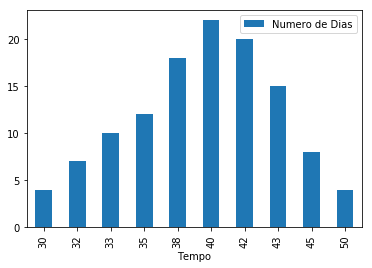

In [80]:
#Grafico de barras
df.plot.bar(y='Numero de Dias', x='Tempo')


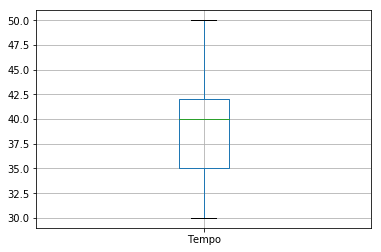

In [81]:
#boxplot
df2.boxplot(column=['Tempo'])

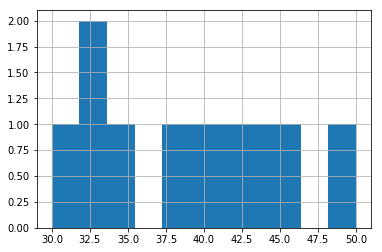

In [82]:
#definindo quantidade de intervalos para o histograma 
k = np.sqrt(len(df2))
df['Tempo'].hist(bins=11)

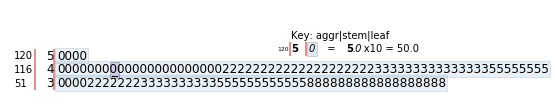

In [83]:
fig, ax = stemgraphic.stem_graphic(df2['Tempo'])

## [16-3]

In [15]:
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Plan_Acoes_stat.xlsx'
df = pd.read_excel(file,sheet_name="Sheet1", index_col=False)

In [16]:
df.head()

,Ação A,Ação B
0,31,25
1,30,33
2,24,27
3,24,34
4,28,32


### [16-3] A)

In [17]:
#Medidas resumo
df.describe()

,Ação A,Ação B
count,24.000000,24.00000
mean,28.166667,29.00000
std,5.222582,4.11783
min,22.000000,16.00000
25%,24.000000,27.00000
50%,28.000000,28.00000
75%,31.000000,33.00000
max,42.000000,34.00000


### [16-3] B)

In [18]:
#variancia, desvio padrão e erro padrão
print("Variancia:\n" + str(df.var()) + " \n<------------> \nDesvio Padrão:\n" + str(df.std()) + "\n <---------->\n"
     + "Erro Padrão: \n" + str(df.sem()))

Variancia:
Ação A    27.275362
Ação B    16.956522
dtype: float64 
<------------> 
Desvio Padrão:
Ação A    5.222582
Ação B    4.117830
dtype: float64
 <---------->
Erro Padrão: 
Ação A    1.066055
Ação B    0.840548
dtype: float64


In [19]:
df.quantile([0.25,0.5,0.75])

,Ação A,Ação B
0.25,24.0,27.0
0.50,28.0,28.0
0.75,31.0,33.0


### [16-3] C)

In [20]:
#Outliers Ação B
q1= 24
q3= 31
aiq= q3 - q1
xMenor = q1 - (1.5 * aiq)
xMaior = q3 + (1.5 * aiq)
print (" Menor valor: " + str(xMenor) + "-  Maior valor :" +  str(xMaior))
f = df[['Ação A']]
a = f[f['Ação A']<xMenor]
e = f[f['Ação A']>xMaior]
print("Valores de Outlier extremidade inferior: \n" + str(a) + "\n" + "Valores de Outlier extremidade posterior:\n " + str(e))

 Menor valor: 13.5-  Maior valor :41.5
Valores de Outlier extremidade inferior: 
Empty DataFrame
Columns: [Ação A]
Index: []
Valores de Outlier extremidade posterior:
     Ação A
17      42


In [21]:
#Outliers Ação B
q1= 27
q3= 33
aiq= q3 - q1
xMenor = q1 - (1.5 * aiq)
xMaior = q3 + (1.5 * aiq)
print (" Menor valor: " + str(xMenor) + "-  Maior valor :" +  str(xMaior))
f = df[['Ação B']]
a = f[f['Ação B']<xMenor]
e = f[f['Ação B']>xMaior]
print("Valores de Outlier extremidade inferior: \n" + str(a) + "\n" + "Valores de Outlier extremidade posterior:\n " + str(e))

 Menor valor: 18.0-  Maior valor :42.0
Valores de Outlier extremidade inferior: 
    Ação B
13      16
Valores de Outlier extremidade posterior:
 Empty DataFrame
Columns: [Ação B]
Index: []


### [16-3] D)

In [22]:
#Assimetria da distrubuição dos dados
skewValue = df.skew(axis=0)
skewValue

Ação A    1.045599
Ação B   -1.116754
dtype: float64

In [25]:
#Kurtosis
from scipy.stats import norm, kurtosis
kurtosis(df, fisher=True)

array([0.54205793, 2.12473373])

### [16-3] E)

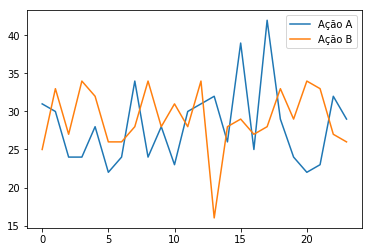

In [26]:
df.plot.line()

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


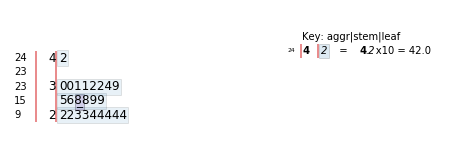

In [28]:
#Ramo e Folhas Ação A
import stemgraphic
fig, ax = stemgraphic.stem_graphic(df['Ação A'])

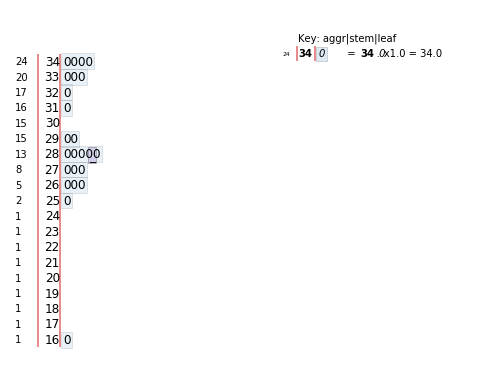

In [29]:
#Ramo e Folhas Ação B
fig, ax = stemgraphic.stem_graphic(df['Ação B'])

Valor de divisões: 4.898979485566356


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016ADC7929B0>,
      dtype=object)

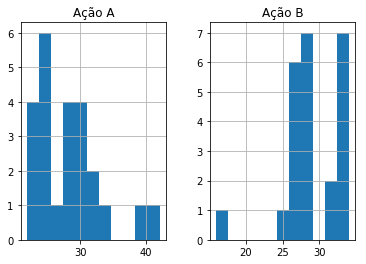

In [31]:
#Histograma
k = np.sqrt(len(df))
print("Valor de divisões: " + str(k))
df.hist(bins=11)

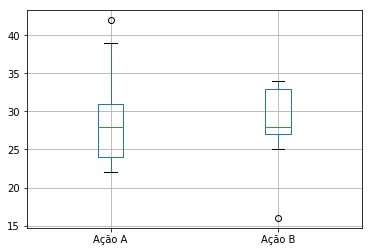

In [32]:
#boxplot
df.boxplot()

In [ ]:
#Exercicio [17-3]

In [98]:
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Hospitais.xlsx'
df = pd.read_excel(file,sheet_name="Sheet1", index_col=False)

In [99]:
df.head()

,Hospital,Investimento
0,A,44
1,B,12
2,C,6
3,D,22
4,E,60


In [100]:
#Media e desvio padrao
df.describe()

,Investimento
count,15.000000
mean,52.000000
std,60.690079
min,4.000000
25%,11.000000
50%,30.000000
75%,62.000000
max,200.000000


In [101]:
#Outliers Ação B
q1= 11
q3= 62
aiq= q3 - q1
xMenor = q1 - (1.5 * aiq)
xMaior = q3 + (1.5 * aiq)
print (" Menor valor: " + str(xMenor) + "-  Maior valor :" +  str(xMaior))
f = df[['Investimento']]
a = f[f['Investimento']<xMenor]
e = f[f['Investimento']>xMaior]
print("Valores de Outlier extremidade inferior: \n" + str(a) + "\n" + "Valores de Outlier extremidade posterior:\n " + str(e))

 Menor valor: -65.5-  Maior valor :138.5
Valores de Outlier extremidade inferior: 
Empty DataFrame
Columns: [Investimento]
Index: []
Valores de Outlier extremidade posterior:
     Investimento
7            200
12           180


In [102]:
df1 = df[(df['Investimento'] <= xMaior) & (df['Investimento'] > xMenor) ]  

In [103]:
#Novas medidas resumo sem os outliers
df1.describe()

,Investimento
count,13.000000
mean,30.769231
std,24.863473
min,4.000000
25%,10.000000
50%,22.000000
75%,50.000000
max,75.000000


In [104]:
#Com a retirada dos outliers a amostra se torna mais homogenia, por isso o menor desvio padrao

# Capitulo 4

### [10-4] A)

In [107]:
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Inadimplencia.xlsx'
df = pd.read_excel(file,sheet_name="Data", index_col=False)
df.head()

,Faixa_Etaria,Inadimplencia
0,1,1
1,1,2
2,1,1
3,1,1
4,1,1


In [108]:
df_agrupado = df.groupby('Faixa_Etaria')

In [109]:
df_agrupado = (df.groupby(by=['Faixa_Etaria'], as_index=False)['Inadimplencia'].sum()).rename(columns={'Inadimplencia':'Inadimplencia Fi'})
df_agrupado

,Faixa_Etaria,Inadimplencia Fi
0,1,10
1,2,87
2,3,211
3,4,136
4,5,104
5,6,30


In [110]:
#Tabela de frequencias

#Frequencia relativa
df_agrupado["Fr"] = df_agrupado["Inadimplencia Fi"] / df_agrupado["Inadimplencia Fi"].sum()
#Frequencia Acumulada
df_agrupado["Fac"] = df_agrupado['Inadimplencia Fi'].cumsum()
#Frequencia relativa acumulada
df_agrupado["Fr (ac)"] = df_agrupado['Fr'].cumsum()
df_agrupado

,Faixa_Etaria,Inadimplencia Fi,Fr,Fac,Fr (ac)
0,1,10,0.017301,10,0.017301
1,2,87,0.150519,97,0.167820
2,3,211,0.365052,308,0.532872
3,4,136,0.235294,444,0.768166
4,5,104,0.179931,548,0.948097
5,6,30,0.051903,578,1.000000


### [10-4] B) 36%

### [10-4] C)

In [112]:

#Calculo porcentagem dos muito endividados
#A porcentagem dos muito individados é 37%
dfa = df[['Inadimplencia']]
dfa = dfa.groupby(['Inadimplencia']).size().reset_index(name='counts')
dfa['Fr'] = dfa['counts'] / dfa['counts'].sum()
dfa

,Inadimplencia,counts,Fr
0,1,27,0.135
1,2,42,0.210
2,3,57,0.285
3,4,74,0.370


### [10-4] D)

In [113]:
#Porcentagem dos com até 20 anos sem dividas
len(df.loc[(df['Faixa_Etaria'] == 1) & (df['Inadimplencia'] ==1)])/len(df.loc[(df['Faixa_Etaria'] == 1)])

0.75

### [10-4] E)

In [114]:
#Porcentagem dos que são +60 pouco endividados
len(df.loc[(df['Faixa_Etaria'] == 6) & (df['Inadimplencia'] ==2)])/len(df.loc[(df['Faixa_Etaria'] == 6)])

0.30434782608695654

### [10-4] F)

In [115]:
#Porcentagem dos que são +40 até 50 medio endividados
len(df.loc[(df['Faixa_Etaria'] == 4) & (df['Inadimplencia'] ==3)])/len(df.loc[(df['Faixa_Etaria'] == 4)])

0.6

### [10-4] G)

In [116]:
dfb = df.groupby(['Faixa_Etaria','Inadimplencia']).size().reset_index(name='counts')

In [117]:
df_pivot = dfb.pivot(index='Faixa_Etaria', columns='Inadimplencia', values='counts')
df_pivot

Inadimplencia,1,2,3,4
Faixa_Etaria,,,,
1,6.0,2.0,NaN,NaN
2,NaN,6.0,13.0,9.0
3,NaN,NaN,5.0,49.0
4,NaN,NaN,24.0,16.0
5,5.0,27.0,15.0,NaN
6,16.0,7.0,NaN,NaN


In [118]:
#Soma das linhas 
#df_pivot['Total_Linhas'] = df_pivot.sum(axis=1)
#df_pivot

In [119]:
#tabela distribuição conjunta de frenquancia com totais pivot
#Total sum per row: 
df_pivot.fillna(0, inplace=True)
#Total sum per row: 
df_pivot.loc[:,'Total'] = df_pivot.sum(axis=1)
#Total sum per column: 
df_pivot.loc['Total',:]= df_pivot.sum(axis=0)
df_pivot

Inadimplencia,1,2,3,4,Total
Faixa_Etaria,,,,,
1,6.0,2.0,0.0,0.0,8.0
2,0.0,6.0,13.0,9.0,28.0
3,0.0,0.0,5.0,49.0,54.0
4,0.0,0.0,24.0,16.0,40.0
5,5.0,27.0,15.0,0.0,47.0
6,16.0,7.0,0.0,0.0,23.0
Total,27.0,42.0,57.0,74.0,200.0


In [120]:
#Teste qui quadrado
#https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

In [121]:
df_pivot.columns

Index([1, 2, 3, 4, 'Total'], dtype='object', name='Inadimplencia')

In [122]:
chi2_contingency(df_pivot)

(247.64162479701326,
 4.840778416710581e-39,
 24,
 array([[  1.08 ,   1.68 ,   2.28 ,   2.96 ,   8.   ],
        [  3.78 ,   5.88 ,   7.98 ,  10.36 ,  28.   ],
        [  7.29 ,  11.34 ,  15.39 ,  19.98 ,  54.   ],
        [  5.4  ,   8.4  ,  11.4  ,  14.8  ,  40.   ],
        [  6.345,   9.87 ,  13.395,  17.39 ,  47.   ],
        [  3.105,   4.83 ,   6.555,   8.51 ,  23.   ],
        [ 27.   ,  42.   ,  57.   ,  74.   , 200.   ]]))

In [123]:
expected_values = chi2_contingency(df_pivot)[3]
expected_values

array([[  1.08 ,   1.68 ,   2.28 ,   2.96 ,   8.   ],
       [  3.78 ,   5.88 ,   7.98 ,  10.36 ,  28.   ],
       [  7.29 ,  11.34 ,  15.39 ,  19.98 ,  54.   ],
       [  5.4  ,   8.4  ,  11.4  ,  14.8  ,  40.   ],
       [  6.345,   9.87 ,  13.395,  17.39 ,  47.   ],
       [  3.105,   4.83 ,   6.555,   8.51 ,  23.   ],
       [ 27.   ,  42.   ,  57.   ,  74.   , 200.   ]])

In [124]:
chisquare = chi2_contingency(df_pivot)[0]
chisquare


247.64162479701326

### Qui quadrado com valor muito alto, logo, variaveis dependentes.

## [12-4] A, B, C, D, E, F )

In [127]:
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Motivacao_Empresas.xlsx'
df_12_4 = pd.read_excel(file,sheet_name="Data", index_col=False)
df_12_4.head()

,Empresa,MotivaçãO
0,1,1
1,1,1
2,1,1
3,1,1
4,1,2


In [128]:
df_Agrupado_12_4 = df_12_4.groupby(['Empresa','MotivaçãO']).size().reset_index(name='counts')
df_Agrupado_12_4

,Empresa,MotivaçãO,counts
0,1,1,36
1,1,2,8
2,1,3,6
3,2,3,3
4,2,4,16
5,2,5,31
6,3,2,8
7,3,3,32
8,3,4,9
9,3,5,1


In [129]:
df_pivot_12_4 = df_Agrupado_12_4.pivot(index='Empresa', columns='MotivaçãO', values='counts')
df_pivot_12_4_chi = df_Agrupado_12_4.pivot(index='Empresa', columns='MotivaçãO', values='counts')
df_pivot_12_4

MotivaçãO,1,2,3,4,5
Empresa,,,,,
1,36.0,8.0,6.0,NaN,NaN
2,NaN,NaN,3.0,16.0,31.0
3,NaN,8.0,32.0,9.0,1.0
4,10.0,33.0,7.0,NaN,NaN
5,NaN,NaN,11.0,31.0,8.0


In [130]:
#tabela distribuição conjunta de frenquancia com totais pivot
#Criando Tabela de frenquencias relativas bivariada
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html
#Total sum per row: 
df_pivot_12_4.fillna(0, inplace=True)
df_pivot_12_4_chi.fillna(0, inplace=True)
#Total sum per row: 
df_pivot_12_4.loc[:,'Total_Row'] = df_pivot_12_4.sum(axis=1)
#Total sum per column: 
df_pivot_12_4.loc['Total_Col',:]= df_pivot_12_4.sum(axis=0)
df_pivot_12_4

MotivaçãO,1,2,3,4,5,Total_Row
Empresa,,,,,,
1,36.0,8.0,6.0,0.0,0.0,50.0
2,0.0,0.0,3.0,16.0,31.0,50.0
3,0.0,8.0,32.0,9.0,1.0,50.0
4,10.0,33.0,7.0,0.0,0.0,50.0
5,0.0,0.0,11.0,31.0,8.0,50.0
Total_Col,46.0,49.0,59.0,56.0,40.0,250.0


In [463]:
#Criando Tabela de frenquencias relativas bivariada http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html
df_pivot_12_4/df_pivot_12_4.loc["Total_Col","Total_Row"]

MotivaçãO,1,2,3,4,5,Total_Row
Empresa,,,,,,
1,0.144,0.032,0.024,0.000,0.000,0.2
2,0.000,0.000,0.012,0.064,0.124,0.2
3,0.000,0.032,0.128,0.036,0.004,0.2
4,0.040,0.132,0.028,0.000,0.000,0.2
5,0.000,0.000,0.044,0.124,0.032,0.2
Total_Col,0.184,0.196,0.236,0.224,0.160,1.0


In [464]:
#Frequencia relativa total coluna
df_pivot_12_4/df_pivot_12_4.loc["Total_Col"]

MotivaçãO,1,2,3,4,5,Total_Row
Empresa,,,,,,
1,0.782609,0.163265,0.101695,0.000000,0.000,0.2
2,0.000000,0.000000,0.050847,0.285714,0.775,0.2
3,0.000000,0.163265,0.542373,0.160714,0.025,0.2
4,0.217391,0.673469,0.118644,0.000000,0.000,0.2
5,0.000000,0.000000,0.186441,0.553571,0.200,0.2
Total_Col,1.000000,1.000000,1.000000,1.000000,1.000,1.0


### [12-4] H)

In [133]:
#qui quadrado
chi2_contingency(df_pivot_12_4_chi)

(375.06566104702745,
 6.040404998146245e-70,
 16,
 array([[ 9.2,  9.8, 11.8, 11.2,  8. ],
        [ 9.2,  9.8, 11.8, 11.2,  8. ],
        [ 9.2,  9.8, 11.8, 11.2,  8. ],
        [ 9.2,  9.8, 11.8, 11.2,  8. ],
        [ 9.2,  9.8, 11.8, 11.2,  8. ]]))

In [134]:
#Qui quadrado
chisquare = chi2_contingency(df_pivot_12_4_chi)[0]
chisquare

375.06566104702745

## [14-4] A)

In [136]:
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Ex_14_4.xlsx'
df_14_4 = pd.read_excel(file,sheet_name="Sheet1", index_col='Porte da Empresa')
#Tabela contingencia
df_14_4.head()

,SP,RJ,RS,Total
Porte da Empresa,,,,
Micro,15,10,15,40
Pequena,25,20,10,55
Média,40,12,8,60
Grande,30,8,7,45
Total,110,50,40,200


In [137]:
#deleta linha baseado no index delete row
df_14_4_D = df_14_4.drop('Total')
del df_14_4_D['Total']
df_14_4_D

,SP,RJ,RS
Porte da Empresa,,,
Micro,15,10,15
Pequena,25,20,10
Média,40,12,8
Grande,30,8,7


In [138]:
#Medida de associação por qui quadrado
chisquare = chi2_contingency(df_14_4_D)[0]
chisquare

18.110399449035814

In [139]:
#associacao phi nao aplicavel. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

In [140]:
#Coeficiente de contingencia c = np.sqrt(chisquare/(n+chisquare)) onde n é o numero de observaçoes da matriz
c = np.sqrt(chisquare/(200+chisquare))

#Limite superior do c 0<=c<=c_superior
#c_superior = np.sqrt((min(linhas_matriz,colunas_matriz) - 1)/(min(linhas_matriz,colunas_matriz))

c_superior = np.sqrt((min(200,4) - 1)/(min(200,4)))
print("C: " + str(c) + " C Superior: " + str(c_superior))
#Baixa associação entre as variaveis

C: 0.2881547799553236 C Superior: 0.8660254037844386


In [38]:
#Instalar na primeira vez
#pip install --user prince
#pip install mock

In [142]:
import pandas as pd 
import prince

In [143]:
np.sqrt(25)

5.0

In [223]:
variables = ['Porte da Empresa','SP', 'RJ', 'RS']
df_14_4_G = df_14_4_D.reset_index()
df_14_4_G

,Porte da Empresa,SP,RJ,RS
0,Micro,15,10,15
1,Pequena,25,20,10
2,Média,40,12,8
3,Grande,30,8,7


In [224]:
mca = prince.MCA()

In [225]:
mca = mca.fit(df_14_4_G[variables])
#mca = mca.transform(df_14_4_G) 
print(mca)

MCA()


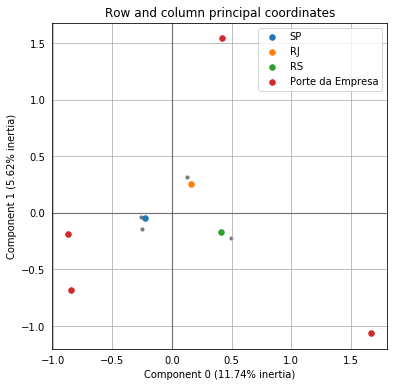

In [227]:
ax = mca.plot_coordinates(
     X=df_14_4_G[variables],
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

#ax.get_figure().savefig('images/mca_coordinates.svg')

In [228]:
mca = mca.transform(df_14_4_G) 
mca

,0,1
0,0.496251,-0.218775
1,0.124881,0.317204
2,-0.257748,-0.038337
3,-0.252543,-0.140328


## [15-4]

In [235]:
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/Avaliacao_Alunos.xlsx'
df = pd.read_excel(file,sheet_name="Data", index_col=False)

In [236]:
df.head()

,Nome,Po,Estatística,Operacoes,Financas
0,Roberto,6.0,7.0,7.0,9.0
1,Eliana,3.0,2.0,5.0,5.0
2,Marcela,4.5,5.5,5.5,7.5
3,Vera,8.0,6.5,9.0,9.5
4,Antonio,7.0,6.0,9.0,9.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA3016278>,
      dtype=object)

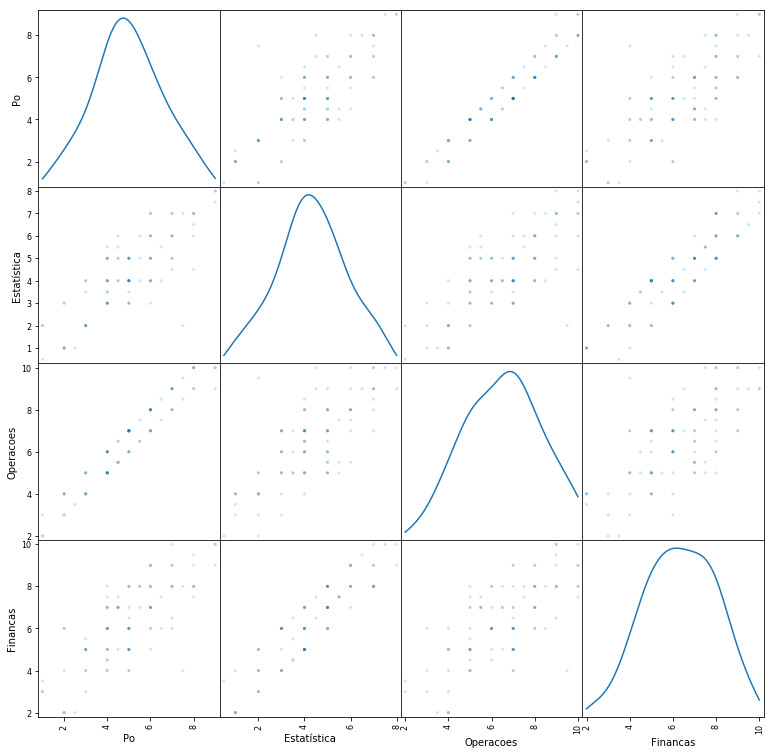

In [239]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.2, figsize = (13, 13), diagonal = 'kde')

## [15-4] A)

In [242]:
from scipy import stats
stats.pearsonr(df['Po'], df['Estatística'])
#Primeiro valor retornado é pearson, o segundo é p-value

(0.7942713330854051, 6.233156611477736e-23)

## [15-4] B)

In [244]:
stats.pearsonr(df['Operacoes'], df['Financas'])
#Primeiro valor retornado é pearson, o segundo é p-value

(0.6889268844055022, 2.320359331138847e-15)

## [15-4] C)

In [246]:
stats.pearsonr(df['Po'], df['Operacoes'])
#Primeiro valor retornado é pearson, o segundo é p-value

(0.9616276981031749, 7.532633235151827e-57)

# CAPITULO 6

## [6-6] 

In [249]:
#Esperança matematica ou valor esperado https://www.youtube.com/watch?v=VMVwGJiD2EA
#Variancia https://www.youtube.com/watch?v=_L43FfabvSI
#Distribuição bernouli e binomial que é a de bernoulli repetida n vezes https://www.youtube.com/watch?v=dl-iS9dSn5M

### [6-6] A)

In [41]:
#converte a variavel z para a probabilidade na tabela 95%
#http://www.bertolo.pro.br/FinEst/Estatistica/DistribuicaoProbabilidades2/normal/index.html Calculadora legal para mostrar 
#graficamente a distribuição
import scipy.stats
norm.cdf(1.8)

#converte um valor para z (cumulative distribution function cdf)
import scipy.stats as st
st.norm(8, 6).cdf(12)


0.7475074624530771

### [6-6] B)

In [42]:
st.norm(8, 6).cdf(5)

0.3085375387259869

### [6-6] C)

In [43]:
1 - st.norm(8, 6).cdf(1)

0.8783274954256188

### [6-6] D)

In [44]:
st.norm(8, 6).cdf(11) - st.norm(8, 36).cdf(5)

0.2246692131266354

### [7-6] A)

In [45]:

st.norm.ppf(.80)

0.8416212335729143

In [288]:
#Distribuição exponencialexemplo livro

#Quando se fala em taxa temd e converter para o scale(primeiro parametro da função abaixo) o primeiro parametro é a variavel de tempo
#exemplo um componente tem vida util media de 120 horas, qual a probabilidade dele falhar nas primeiras 100 horas?
from scipy.stats import expon
scipy.stats.expon.cdf(100,0,120)

0.5654017914929218

## [9-6]

In [299]:
from scipy.stats import expon
print('120 horas: ' +str(scipy.stats.expon.cdf(120,scale=35)) + '\n60 horas: ' + str(scipy.stats.expon.cdf(60,scale=35)))

120 horas: 0.9675667591052045
60 horas: 0.8199076878520476


In [311]:

#A chegada dos pacientes em um laboratório segue distribuição exponencial com taxa média de 1,8 clientes por minuto. Determine:
#a)A probabilidade de que a chegada do próximo cliente demore mais de 30 segundos;
#b)A probabilidade de que a chegada do próximo cliente demore no máximo 1,5 minutos.

print('30 segundos: ' +str(1 - scipy.stats.expon.cdf(0.5,scale=1.8)) + '\n90 segundos: ' + str(scipy.stats.expon.cdf(1.5,scale=1.8)))

30 segundos: 0.7574651283969664
90 segundos: 0.5654017914929217


In [318]:
print('30 segundos: ' +str(1 - scipy.stats.expon.cdf(2,0,0.33)) + '\n90 segundos: ' + str(scipy.stats.expon.cdf(1.5,scale=0.33)))

30 segundos: 0.002332986527749603
90 segundos: 0.9893846535380233


In [329]:
from scipy import integrate
def compute_prob(res):
 #   """
#    Simple integration function to get the area under the PDF
#    """
    prob = 0
    for i in res:
        prob -= round(i, 6)
    print (str( (-1) * prob))
# Set local variables
lam = 1/120
theta = 1 / lam
x_min = 4
x_max = np.inf
# Create PDF
x = lambda x: (theta)*np.exp(-theta*x)
# Integrate
compute_prob(integrate.quad(x, x_min, x_max))
# Answer 

-0.0



# Capitulo 9

[1-9]
1) Em que situações são aplicados os testes paramétricos? 
Testes parametricos são aplicados para definir se uma condição é falsa ou verdadeira dada uma hipostese.

Quais os pressupostos dos testes paramétricos?
Pressupostos:
    Normalidade: Amostras com distribuição normal
    Uniformidade: Variaveis homogeneas
    Erros: Distrução aleatoria dos dados nas variaveis.

[2-9]

2) Quais as vantagens e desvantagens dos testes paramétricos?
[Vantagens]
São mais eficientes.
Perceptíveis às características da informação obtida.
Os erros são muito improváveis.
Os cálculos probabilísticos são muito precisos.

[Desvantagens]
Os cálculos são difíceis de executar.
Os dados que podem ser observados são limitados.


[3-9]
3) Quais os principais testes paramétricos para verificar a normalidade dos dados? Em que situações deve-se utilizar cada um deles?

TESTE KS: è um teste de hipotese que compara a distruição acumulada da variavel com uma distruição teorica. O resultado do teste é o ponto com a maior diferença entre as duas distribuições. E o objetivo é verificar se os dados são provenientes de um população com distribuição normal. Deve ser utilizado para amostras grandes(n>30)

TESTE SHAPIRO: Tem a mesma finalidade do teste KS, porém pode ser utilizado com amostras 4<n<2000.

exercicio 4 é repetido 

[5-9]
5) Para testar uma única média populacional, pode-se utilizar o teste z e o teste t de Student. Em que casos cada um deles deve ser aplicado?
Teste Z: Quando se conhece o desvio padrao populacional, e a distribuição é normal.
Teste T: Quando não se conhece o desvio padrao populacional, e a distribuição é t student.

6) Quais os principais testes de comparação de médias? Quais os pressupostos de cada teste?

T Student: Serve para comparar duas amostrar independentes provenientes da mesma população.
VAriaveis populacionais homogenias.
Mesma população para as amostras
Amostras aleatorias
Variancia populacional desconhecida.

ANOVA: Necessita de tres ou mais populações, e uma amostra de cada uma.
As amostras devem ser independentes entre si.
Populações com distribuição normal.
Variancias populacionais devem ser homogenias.


## [7-9]

In [348]:
df_7_9 = {'MONTH': ['JAN','FEV','MAR','ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT','NOV', 'DEZ'],
        'SOLD': [48,52,50,49,47,50,51,54,39,56,52,55]}

df_7_9 = pd.DataFrame(df_7_9, columns = ['MONTH', 'SOLD'])

df_7_9


,MONTH,SOLD
0,JAN,48
1,FEV,52
2,MAR,50
3,ABR,49
4,MAI,47
5,JUN,50
6,JUL,51
7,AGO,54
8,SET,39
9,OUT,56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA58956D8>]],
      dtype=object)

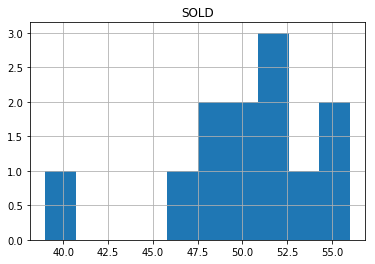

In [355]:
df_7_9.hist()

In [362]:
from scipy.stats import kstest, norm
w_critico, p_valor = stats.shapiro(df_7_9['SOLD'])

In [363]:
p_valor

0.15085026621818542

In [365]:
p_valor > 0.05 
#HO Não é rejeitado, logo a amostra provem de uma possivel distribuição normal.

True

## [8-9]

In [368]:
#Exercicio [8-9]
df_8_9 = {'TEMPERATURA': [12.5,14.2,13.4,14.6,12.7,10.9,16.5,14.7,11.2,10.9,12.1,12.8,
                          13.8,13.5,13.2,14.1,15.5,16.2,10.8,14.3,12.8,12.4,11.4,16.2,
                          14.3,14.8,14.6,13.7,13.5,10.8,10.4,11.5,11.9,11.3,14.2,11.2,
                          13.4,16.1,13.5,17.5,16.2,15.0,14.2,13.2,12.4,13.4,12.7,11.2]}

df_8_9 = pd.DataFrame(df_8_9, columns = ['TEMPERATURA'])

df_8_9.head()

,TEMPERATURA
0,12.5
1,14.2
2,13.4
3,14.6
4,12.7


In [394]:
from scipy.stats import kstest, norm

media = np.mean(df_8_9['TEMPERATURA'])
print(str(media))

std = np.std(df_8_9['TEMPERATURA'])
print(str(std))

ks_statistic, p_value = kstest(df_8_9['TEMPERATURA'], cdf = 'norm', N=len(df_8_9['TEMPERATURA']),args=(media,std))
print(ks_statistic, p_value)
print("como " + str(ks_statistic) + " é menor que "+ " dc=0.23" +" A hipotese nula não é rejeitada, logo a amostra provavelmente vemd e um dist normal")


13.368750000000004
1.7385525888412654
0.08795431728523254 0.851644177824617
como 0.08795431728523254 é menor que  dc=0.23 A hipotese nula não é rejeitada, logo a amostra provavelmente vemd e um dist normal


In [391]:
len(df_8_9)

48

In [390]:
#EXEMPLO DO LIVRO PARA BATER VALORES
df = {'PRODUCAO': [52,30,52,50,36,34,44,40,38,50,42,44,42,55,48,30,44,36,36,38,36,34,42,55,48,40,50,40,38,34,55,52,44,40,44,42]}
df =  pd.DataFrame(df, columns = ['PRODUCAO'])
df.head()

,PRODUCAO
0,52
1,30
2,52
3,50
4,36


In [387]:
media = np.mean(df['PRODUCAO'])
print(str(media))

std = np.std(df['PRODUCAO'])
print(str(std))

42.638888888888886
7.000606234771456


In [388]:
ks_statistic, p_value = kstest(df['PRODUCAO'], cdf = 'norm', N=len(df['PRODUCAO']),args=(media,std))
print(ks_statistic, p_value)

0.11736498236207304 0.6880922438427254


## [9-9]

In [ ]:
#Exercicio [9-9]

In [421]:
df_9_9 = {'Aluno1': [6.4,5.8,6.9,5.4,7.3,8.2,6.1,5.5,6.0],
        'Aluno2': [6.5,7.0,7.5,6.5,8.1,9.0,7.5,6.5,6.8]}
v2= 9-2
v1= 2-1

In [427]:
df_9_9 = pd.DataFrame(df_9_9, columns = ['Aluno1', 'Aluno2'])
df_9_9

print('v1: '+str(v1)+ '\nv2: '+str(v2))
print(stats.levene(df_9_9['Aluno1'],df_9_9['Aluno2']))
print ("como p-value > 0.05 hipotese nula não é rejeitada, logo a variancia populacional dos 2 grupos podem ser homogeneas")

v1: 7
v2: 1
LeveneResult(statistic=0.01299169974738361, pvalue=0.9106707653539808)
como p-value > 0.05 hipotese nula não é rejeitada, logo a variancia populacional dos 2 grupos podem ser homogeneas


## [10-9]

In [411]:
#Exercicio [10-9]
media_amostra = 65
media_populacional = 60
desvio_padrao = 3.5
tamanho_amostra = 36
desvio_padrao_pop = desvio_padrao/np.sqrt(tamanho_amostra)


In [412]:
#Teste z 
z=(media_amostra - media_populacional)/(desvio_padrao/np.sqrt(tamanho_amostra))
z

#hipotese nula rejeitada (rever)

8.571428571428571

## [11-9]

In [433]:
from scipy.stats import ttest_ind
data1 = [72,58,91,88,70,76,98,101,65,73,79,82,80,91,93,88,97,83,71,74]
data2 = [66,40,55,70,76,61,53,50,47,61,52,48,60,72,57,70,66,55,46,51]
stat, p = ttest_ind(data1, data2, equal_var=True)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
	print('Provavelmente a mesma distribuição')
else:
	print('Provavelmente distribuições diferentes')

stat=6.920824, p=0.000000
Provavelmente distribuições diferentes


In [458]:
#https://stackoverflow.com/questions/24904822/scipy-stats-ttest-ind-without-array-python
#https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
from scipy.stats import ttest_ind
data1 = [220,212,227,234,204,209,211,245,237,250,208,224,220,218,208,205,227,207,222,213,210,234,240,227,229,224,204,210,215,228]
data2 = [195,180,200,204,180,195,200,210,205,211,175,198,195,200,190,200,222,198,201,194,190,204,230,222,209,198,195,190,201,210]
stat, p = ttest_ind(data1, data2)
print('stat=%.6f, p=%.6f' % (stat, p))
if p > 0.05:
    print('Provavelmente a mesma distribuição')
else:
    print('Provavelmente distribuições diferentes')

stat=6.476923, p=0.000000
Provavelmente distribuições diferentes


# Capitulo 11 Regressão linear


## [1-11]

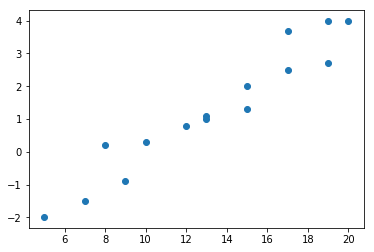

In [4]:
import matplotlib.pyplot as plt
#https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8
#Regressão simples
#normalizaçao e padronizacao
#https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9
#https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8
#http://artedosdados.blogspot.com/2013/09/regressao-linear-multipla-em-python.html
#https://www.w3schools.com/python/python_ml_linear_regression.asp
#https://neylsoncrepalde.github.io/2018-02-25-regressao-linear-python/

df_1_11 = {'Ano': [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012],
        'Investimento_Educacao': [7.00,9.00,15.00,12.00,10.00,15.00,20.00,17.00,8.00,5.00,13.00,13.00,19.00,19.00,17.00],
         'Taxa_crescimento_pib': [-1.50,-0.90,1.30,0.80,0.30,2.00,4.00,3.70,0.20,-2.00,1.00,1.10,4.00,2.70,2.50]}
df_1_11 = pd.DataFrame(df_1_11, columns = ['Ano', 'Investimento_Educacao', 'Taxa_crescimento_pib'])

plt.scatter(df_1_11['Investimento_Educacao'],df_1_11['Taxa_crescimento_pib'])
plt.show()

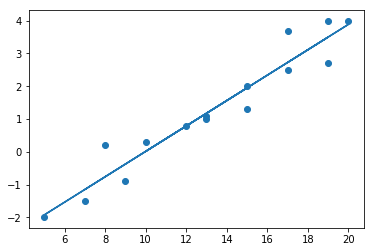

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

x = df_1_11['Investimento_Educacao']
y = df_1_11['Taxa_crescimento_pib']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

### [1-11] a)

In [457]:
#a) Taxa de Crescimento do PIB (%)  = -3,8563 + 0,3872*Investimento em Educação (bilhões de US$)

### [1-11] b)

In [454]:
#b)
r

0.9617769753749192

### [1-11] c)

In [1]:
#c)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [7]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(x)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()
# mostrando as previsões para o mesmo conjunto passado
#results.predict(X_sm)

C:\Users\Wesleya\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Taxa_crescimento_pib   R-squared:                       0.925
Model:                              OLS   Adj. R-squared:                  0.919
Method:                   Least Squares   F-statistic:                     160.4
Date:                  Wed, 27 May 2020   Prob (F-statistic):           1.09e-08
Time:                          19:55:09   Log-Likelihood:                -10.943
No. Observations:                    15   AIC:                             25.89
Df Residuals:                        13   BIC:                             27.30
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.8563      0.429     -8.993      0.000      -4.783      -2.930
Investimento_Educacao     0.3872      0.031     12.664      0.000       0.321       0.453
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.727
Skew:                           0.507   Prob(JB):                        0.695
Kurtosis:                       2.631   Cond. No.                         43.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### [1-11] d)

In [9]:
#d)
#0  = -3,8563 + 0,3872*x
3.8563/0.3872

9.959452479338843

### [1-11] e)

In [10]:
#e)-3,8563 

### [1-11] f)

In [ ]:
#f)y = -3,8563 + 0,3872*11
# y = 0,4029%


### [1-11] g)

In [11]:
#g) Intervalod e confiança regressão linear
results.conf_int(alpha=0.05, cols=None)

,0,1
const,-4.782675,-2.929889
Investimento_Educacao,0.321109,0.453204


In [12]:
#y = -4.782675 + 0.321109*11
# - 1.25%
#y = -2.929889 + 0.453204*11
#   2,05% 

## [2-11]

In [14]:
#Exercicio[2-11]
#Regressão multipla
#http://artedosdados.blogspot.com/2013/09/regressao-linear-multipla-em-python.html
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/corrupcao.xlsx'
df_2_11 = pd.read_excel(file,sheet_name="Data", index_col=False)
df_2_11.head()

,PaíS,Cpi,Idade,Horas
0,Argentina,2.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0
3,Belgium,7.1,67,30.1
4,Brazil,3.7,59,35.0


In [20]:
x = np.column_stack((df_2_11['Idade'],df_2_11['Horas']))
y = df_2_11['Cpi']
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(x)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()
# mostrando as previsões para o mesmo conjunto passado
#results.predict(X_sm)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cpi   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     11.41
Date:                Thu, 28 May 2020   Prob (F-statistic):           8.55e-05
Time:                        13:43:41   Log-Likelihood:                -107.81
No. Observations:                  52   AIC:                             221.6
Df Residuals:                      49   BIC:                             227.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1589      4.754      3.188      0.002       5.605      24.713
x1             0.0701      0.033      2.138      0.038       0.004       0.136
x2            -0.4245      0.117     -3.631      0.001      -0.659      -0.190
==============================================================================
Omnibus:                        7.799   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                2.542
Skew:                          -0.033   Prob(JB):                        0.281
Kurtosis:                       1.919   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### [2-11] b)

In [ ]:
#b) Sim conforme pois p>t

### [2-11] c)

In [21]:
#c) Cpi = 15.1589 + 0.0701*Idade -0.4245 Horas 

### [2-11] d)

In [22]:
#d) R-squared:	0.318

### [2-11] e)

In [23]:
#e)Quanto mais se trabalha menor é a percepção do cpi, ou seja quanto mais se trabalha maior é a 
#percepção que o cidadão tem de que esta sendo roubado rs. mas claro, analisando friamente, países desenvolvidos
#tem carga de trabalho menor, vide automação, educação de qualidade etc... Muito provavelemnte há outras variaveis
#com poder explicativo melhor que esta.

#O coeficiente da variavei de idade media dos bilionarios diz que quanto maior a idade média dos bilionarios, 
#menor a percepção de corrupção e maior o indice cpi. Pode ser justificada pelo fato que países desenvolvidos tendem a ter
#mais bilionarios "antigos", devido a sua economia ter se desenvolvido antes das demais, além claro, de exepctativa de vida 
#media desses países serem mais alta. 

## [3-11] 

In [24]:
#Exercicio[3-11]
#Regressão multipla
#http://artedosdados.blogspot.com/2013/09/regressao-linear-multipla-em-python.html
file = 'C:/Users/Wesleya/Downloads/Material complementar/Bancos de dados/corrupcaoemer.xlsx'
df_3_11 = pd.read_excel(file,sheet_name="Data", index_col=False)
df_3_11.head()

,PaíS,Cpi,Idade,Horas,Emergente
0,Argentina,2.9,72,35.0,1
1,Australia,8.7,64,32.0,0
2,Austria,7.9,72,32.0,0
3,Belgium,7.1,67,30.1,0
4,Brazil,3.7,59,35.0,1


In [26]:
x = np.column_stack((df_3_11['Idade'],df_3_11['Horas'],df_3_11['Emergente']))
y = df_3_11['Cpi']
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(x)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()
# mostrando as previsões para o mesmo conjunto passado
#results.predict(X_sm)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cpi   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     26.45
Date:                Thu, 28 May 2020   Prob (F-statistic):           3.04e-10
Time:                        20:02:15   Log-Likelihood:                -92.379
No. Observations:                  52   AIC:                             192.8
Df Residuals:                      48   BIC:                             200.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6819      3.642      2.933      0.005       3.359      18.005
x1             0.0319      0.025      1.260      0.214      -0.019       0.083
x2            -0.1604      0.097     -1.645      0.107      -0.356       0.036
x3            -3.0742      0.493     -6.235      0.000      -4.065      -2.083
==============================================================================
Omnibus:                        3.975   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                2.959
Skew:                           0.541   Prob(JB):                        0.228
Kurtosis:                       3.442   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#https://planspace.org/20150423-forward_selection_with_statsmodels/
#https://github.com/sam4410/stepwise-regression/blob/master/stepwise_regression/step_reg.py
#https://towardsdatascience.com/stopping-stepwise-why-stepwise-selection-is-bad-and-what-you-should-use-instead-90818b3f52df
#Outro codigo para stepwise https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447
#https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(df_3_11, 'Cpi')

print (model.model.formula)
print (model.rsquared_adj)

Cpi ~ Emergente + 1
0.5771857030917814
